In [1]:
import pandas as pd 
df = pd.read_csv("./adult.csv", skipinitialspace=True, na_values="?")

for col in ['workclass', 'educatoin', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
    df[col] = df[col].astype('category')
# check type of each column    
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
educatoin         category
educatoin_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country    category
income            category
dtype: object

In [2]:
# get list of categorical columns 
category_columns = list(df.select_dtypes(include=['category']).columns)
category_columns

['workclass',
 'educatoin',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [3]:
# get list of numeric columns
numberic_columns = list(df.select_dtypes(include=['int64']).columns)
#because educatoin_num had relationship with educatoin
numberic_columns.remove('educatoin_num')
numberic_columns

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [4]:
# remove rows with missing values
for col in category_columns:
    df = df[df[col].str.contains("\\?") == False]
nrow2 = df.shape[0]
nrow2

30162

In [5]:
# check the unique category values in income column
df['income'].unique()

[<=50K, >50K]
Categories (2, object): [<=50K, >50K]

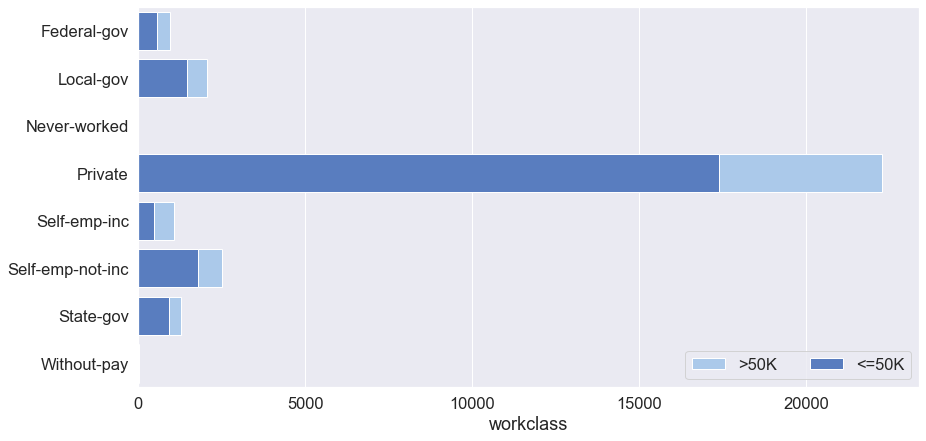

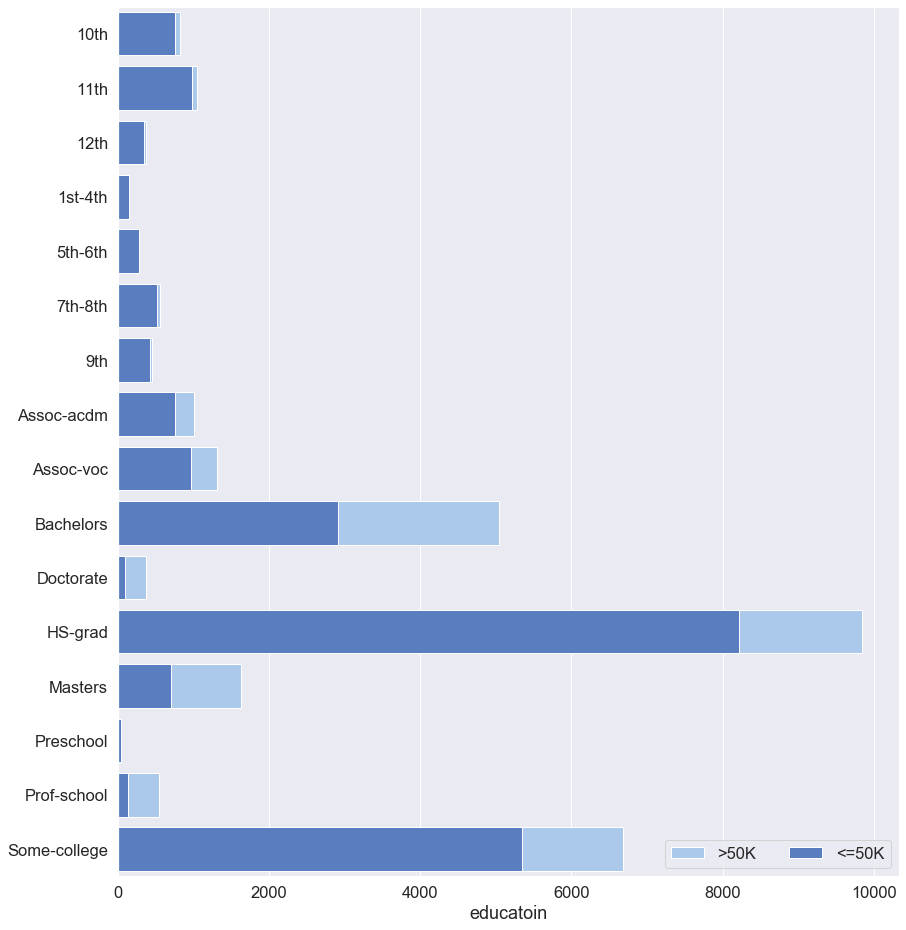

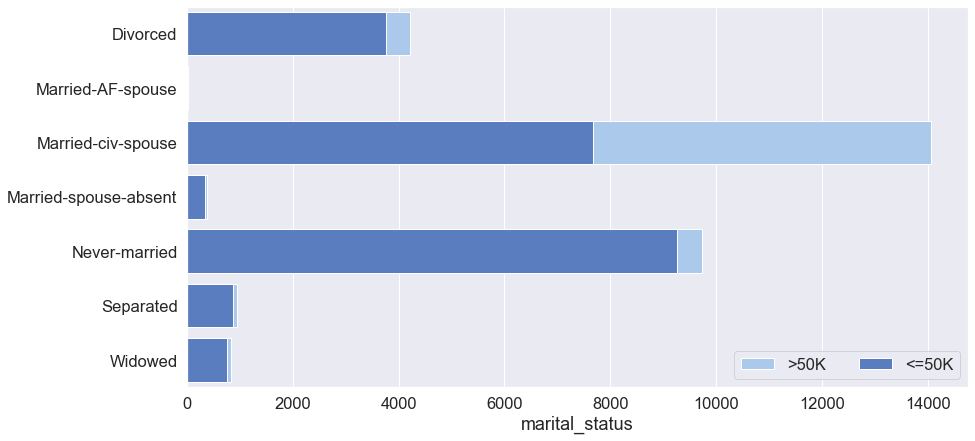

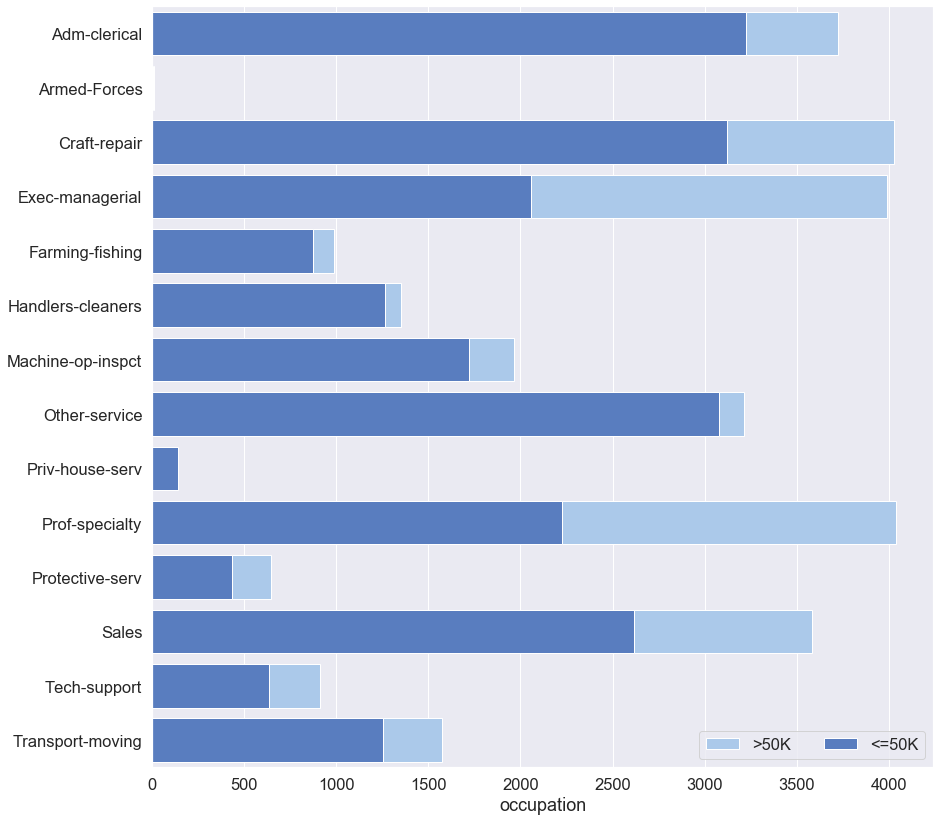

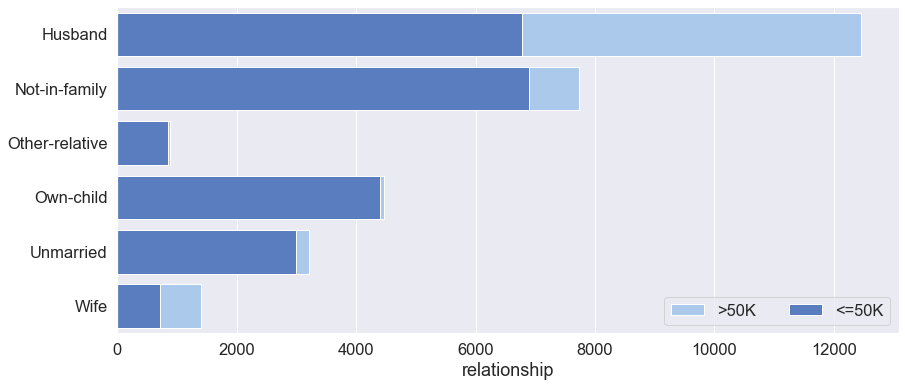

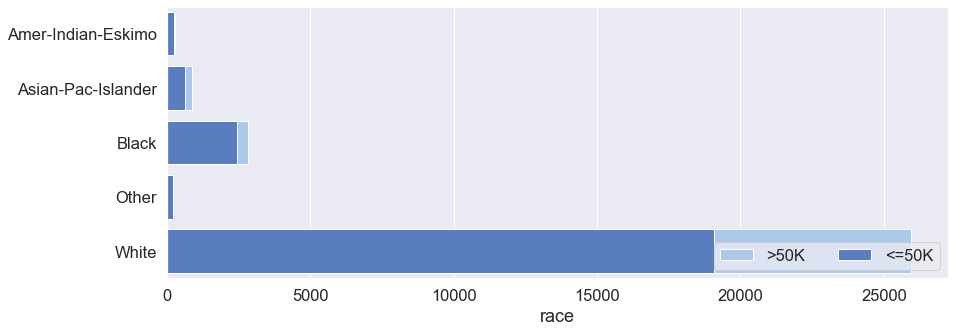

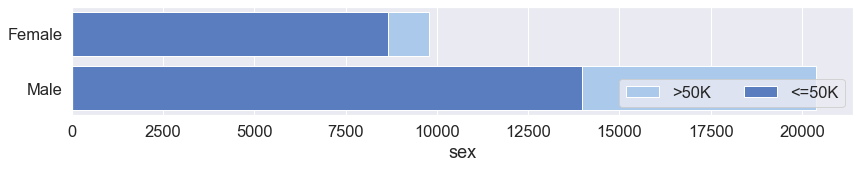

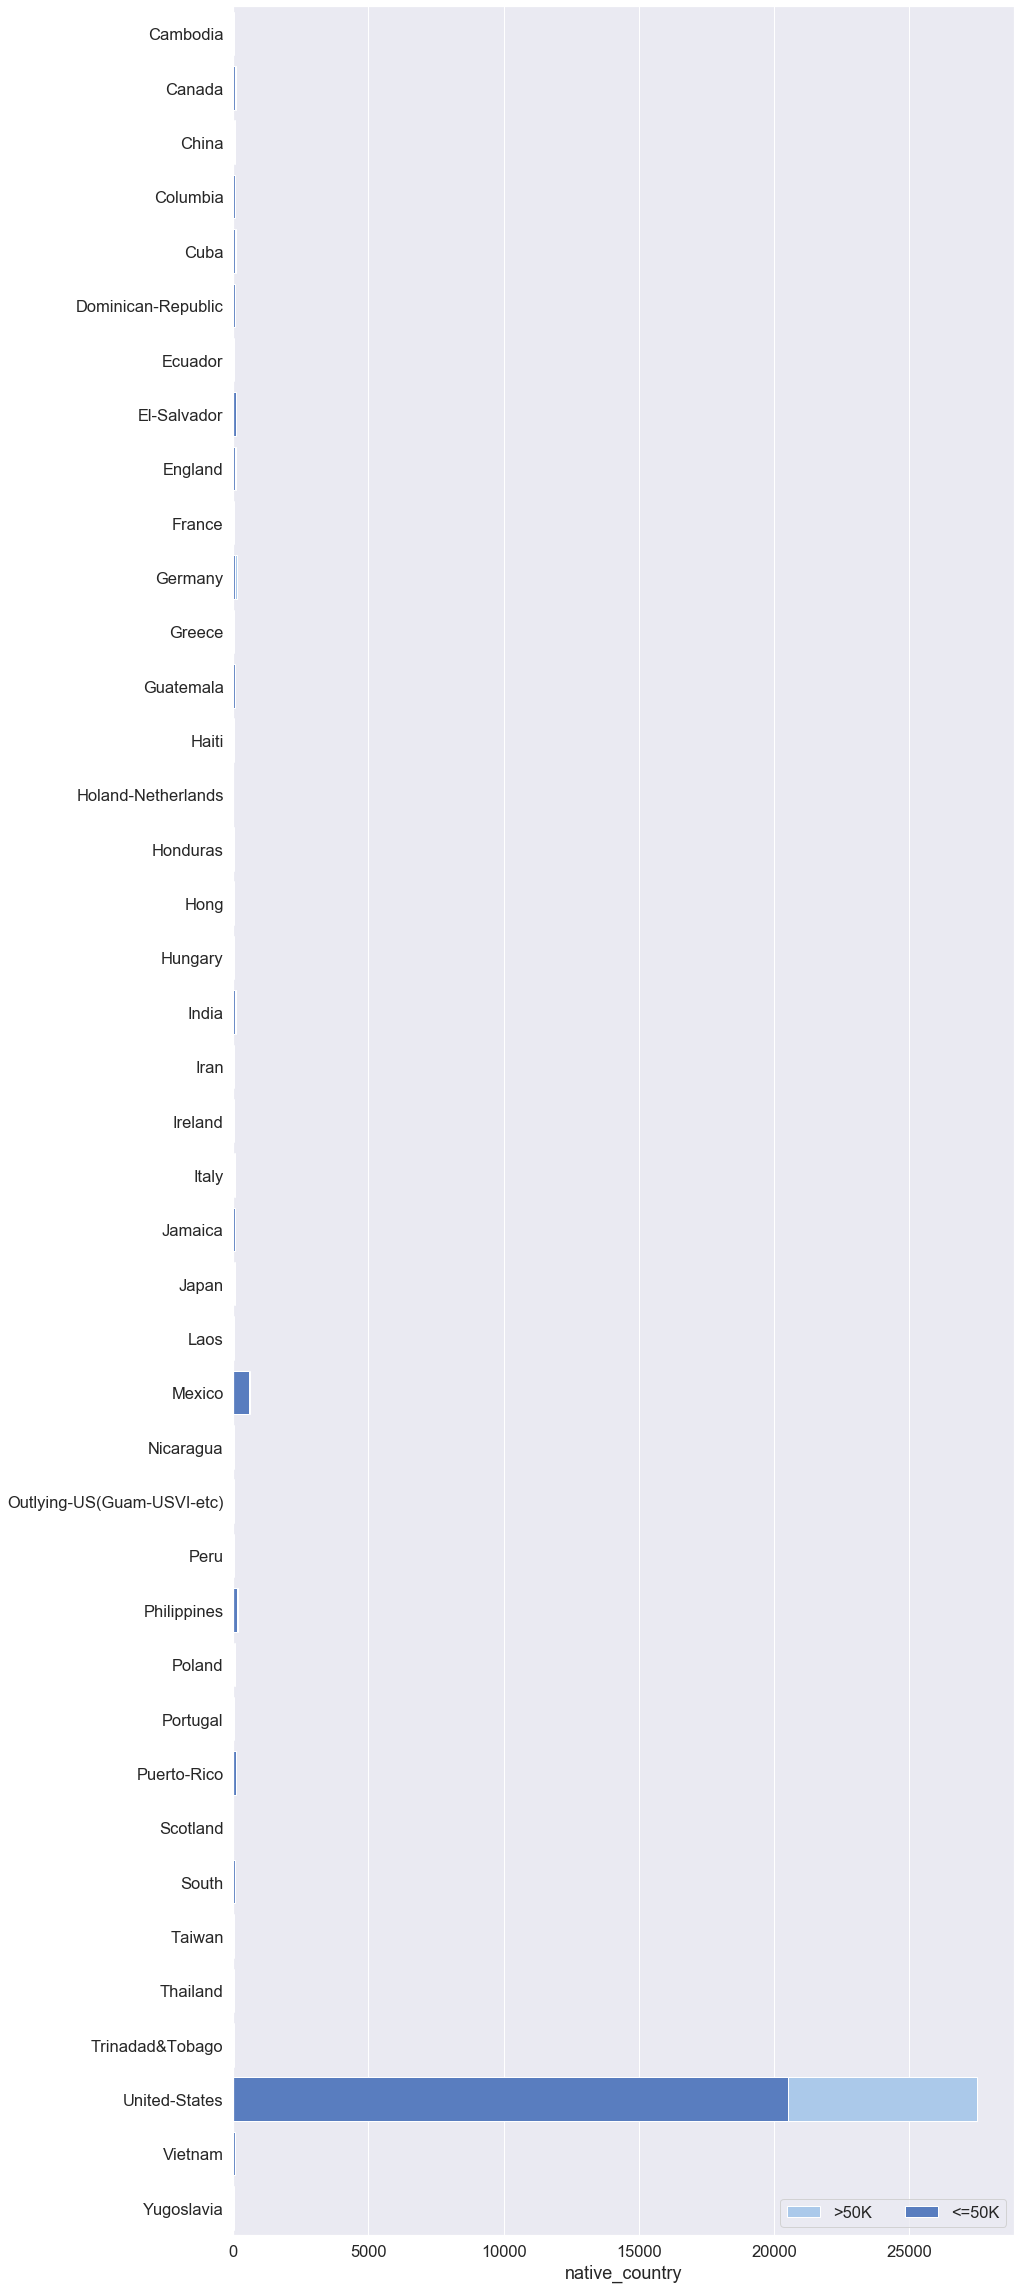

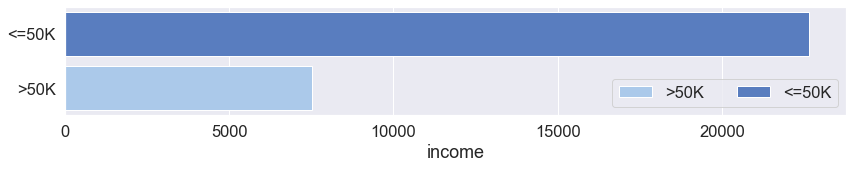

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
df_low_income = df[df['income'] == '<=50K']
for col in category_columns:
    total_column = df[col].unique().size
    f, ax = plt.subplots(figsize=(14, total_column))
    
    sns.set_color_codes("pastel")
    sns.countplot(y=col, data=df, color="b", label=">50K")
    
    sns.set_color_codes("muted")
    sns.countplot(y=col, data=df_low_income, color="b", label="<=50K")
    
    max = df[col].value_counts().max()
    ax.set(xlim=(0, max * 1.05), ylabel="", xlabel=col)
    
    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)


In [8]:
df.income = df.income.apply(lambda x:0 if x=='<=50K' else 1)
df.income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: category
Categories (2, int64): [0, 1]

In [9]:
# one hot encoding sex 
one_hot_coding =  pd.get_dummies(df[['workclass',
 'educatoin',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']])
one_hot_coding.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,educatoin_10th,educatoin_11th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [10]:
columns = list(one_hot_coding.columns) 
columns

['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'educatoin_10th',
 'educatoin_11th',
 'educatoin_12th',
 'educatoin_1st-4th',
 'educatoin_5th-6th',
 'educatoin_7th-8th',
 'educatoin_9th',
 'educatoin_Assoc-acdm',
 'educatoin_Assoc-voc',
 'educatoin_Bachelors',
 'educatoin_Doctorate',
 'educatoin_HS-grad',
 'educatoin_Masters',
 'educatoin_Preschool',
 'educatoin_Prof-school',
 'educatoin_Some-college',
 'marital_status_Divorced',
 'marital_status_Married-AF-spouse',
 'marital_status_Married-civ-spouse',
 'marital_status_Married-spouse-absent',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-o

In [11]:
combined = pd.concat([df['income'], df[numberic_columns], one_hot_coding], axis=1)
combined.head()

,income,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,39,77516,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,50,83311,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,38,215646,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,0,53,234721,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,28,338409,0,0,40,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [12]:

# X = df[['age', 'workclass', 'fnlwgt', 'educatoin', 'educatoin_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week']]
X = combined[columns]
y = combined['income']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.3)

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [14]:
#Confusion Matrix
#The result is telling us that we have 2089+416 correct predictions and 335+177 incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6263  534]
 [1016 1236]]


In [15]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6797
           1       0.70      0.55      0.61      2252

    accuracy                           0.83      9049
   macro avg       0.78      0.74      0.75      9049
weighted avg       0.82      0.83      0.82      9049



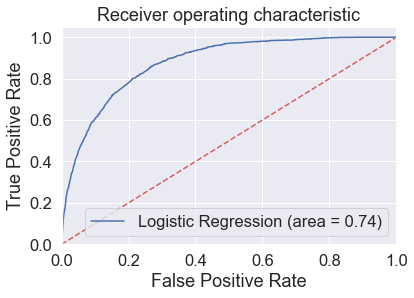

In [16]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#reference https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

<module 'matplotlib.pyplot' from '/Users/datvt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

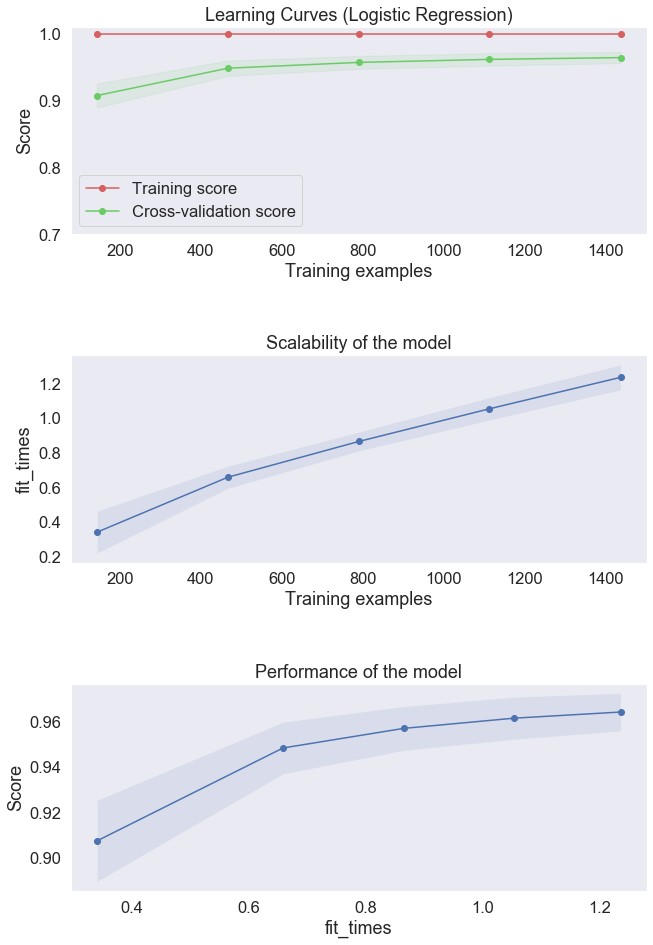

In [46]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.tight_layout(pad=5.05)
axes
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
# five fold cross validation (20%)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
title = "Learning Curves (Logistic Regression)"

# cross validation score and traning score is not much change after 800 example
plot_learning_curve(logreg, title, X, y, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

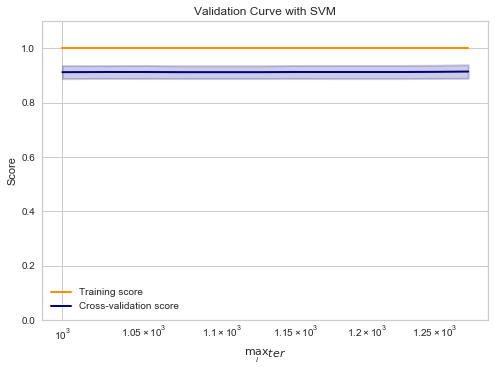

In [52]:
# because logistic regression has no hyperparameter, 
# this is just try to run validation_curve, to learn, not for real result
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.arange(1000, 1300, 25)
train_scores, test_scores = validation_curve(
    LogisticRegression(), X, y, param_name="max_iter", param_range=param_range,
    scoring="accuracy", n_jobs=4)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\max_iter$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()